# Import modules

In [1]:
# -*- coding: utf-8 -*-
import numpy
import random
from matplotlib import pyplot as plt
from math import exp
%matplotlib inline

# Initial parameters

In [2]:
# Population size
n = 1                           

# Default Time beginning (second)
t=0

# Default trial duration (second)
duration = 1.00 

# Default Time resolution (second)
dt = 0.0001
 
# Thresholds(mV?)___________________________________________SEE PAPERS
Msn_h = -19.00             
Fsi_h = -19.00                 
Gp_h  = -9.00     


# Weights______________________________________________SEE PAPERS
GpMsn_G  = 1.00                               
MsnFsi_G = 1.00                             
FsiGp_G  = 1.00                          


# Time constants (second)______________________________SEE PAPERS
GpMsn_tau  = 0.00075    #0.75ms(Czubayko and Plenz, 2002; Koos et al., 2004; Gittis et al., 2010)
MsnFsi_tau = 0.00025    #0.25ms(Gittis et al. 2010)
FsiGp_tau  = 0.01500 


# Delays (second)______________________________________SEE PAPERS
GpMsn_D  = 0.0670     #6.7ms (Czubayko and Plenz, 2002; Koos et al., 2004; Gittis et al., 2010)
MsnFsi_D = 0.0365     #3.6ms (Gittis et al., 2010)
FsiGp_D  = 0.0130


In [3]:
#Noise level (%)  = sigma from paper
#GpMsn_N   =   0.030 
#MsnFsi_N  =   0.005
#FsiGp_N   =   0.002

In [4]:
# inputs
Msn_I = 0
Fsi_I = 0
Gp_I  = 0

# Activities at time t:
GpMsn_m  = 0
MsnFsi_m = 0
FsiGp_m  = 0

# Activities at dt
GpMsn_dm  = 0
MsnFsi_dm = 0
FsiGp_dm  = 0

# Connectivity J
GpMsn_J  = 1
MsnFsi_J = 1
FsiGp_J  = 1

# Initialization of the random generator (reproductibility !)
numpy.random.seed(1)

# Noise Function @

In [5]:
#White Gaussian Noise
def WGnoise():
    """A gaussian generator: give a number with a mean=0 and sigma=1"""
    
    n = numpy.random.normal(0,1)
    return n

In [6]:
def noise(Z, level):    #Z = size of the population
    Z = (numpy.random.uniform(-level/2,level/2,Z))*Z
    return Z

# Corrected Input function @

In [7]:
#Function returning the corrected Input
def Ic(Input=0,threshold=0):
    """Give the corrected input: 0 if the"""
    
    if Input - threshold <= 0:
        return 0
    else:
        return (Input - threshold)

# Activity at time t-Delta (delay) function @

In [8]:
# function to get the index "-delay/dt" in the list representing m(t-Delta) 
m = 0
def mdelta(synapse_value,delay):
    """give back the value corresponding to the activity at a time t-delay"""
    
    if t < delay:                # if the delay is the time is too small, we take m(t-delta)=0
        m = 0
    elif t >= delay:             # if the time is above or equal to the delay, we can find the m(t-delta)
        m = synapse_value[int(-delay/dt)]   
    return m

#            ================= Simulation Core =================

In [9]:
it = 0   #Number of iteration (with step dt) : a simple iteration counter

time_value = [0] #we put in a list every time to retrieve them in a gradual order

#we put in a list every value of activity to retrieve them in a time order; easy way to substract the delay
GpMsn_value  = [0] 
MsnFsi_value = [0]
FsiGp_value  = [0]

In [10]:
while t < duration:    # when the time is strictly under 1 seconde
    
    t = t+dt           #for each iteration, add (the step) dt to the time
    it += 1            #for each iteration, add 1 to the iteration counter
    
# Stock activity & time :for plotting    
    
    time_value.append(t)     #command to add every time used in a list

    GpMsn_value.append(GpMsn_m) #command to add all activities of each population in a list 
    MsnFsi_value.append(MsnFsi_m) #respectively ; after each iteration
    FsiGp_value.append(FsiGp_m)
    
# on va recuperer la valeur de l'activité a un temps t en reprenant l'index de la valeur 
# t-delta de la liste temps et l'utiliser pour trouver la valeur m(delta) a retrancher a notre
# derniere valeure de m = m(t)
    
    GpMsn_mdelta = mdelta(GpMsn_value,GpMsn_D)
    MsnFsi_mdelta = mdelta(MsnFsi_value,MsnFsi_D)
    FsiGp_mdelta = mdelta(FsiGp_value,FsiGp_D)

    
    
    GpMsn_m += GpMsn_dm    # we add the activity (dm) to the global activity (m),
    MsnFsi_m += MsnFsi_dm    # after a step dt ; for all population
    FsiGp_m += FsiGp_dm    #stored in the list ("PopulationNames"_value)

    
    
    
    # ADD recurent connexion
    
#Update of inputs                                                     + external input if needed
    Msn_I = - MsnFsi_G * MsnFsi_J * MsnFsi_mdelta + WGnoise() #+ Msn_I        #White gaussian Noise
    Fsi_I = - FsiGp_G * FsiGp_J * FsiGp_mdelta + WGnoise()    #+ Fsi_I
    Gp_I  = - GpMsn_G * GpMsn_J * GpMsn_mdelta + WGnoise()    #+ Gp_I    

#Update of activities
    GpMsn_dm  = dt * ( -GpMsn_m + Ic(Msn_I,Msn_h) ) / GpMsn_tau # no noise for the moment 
    MsnFsi_dm = dt * ( -MsnFsi_m + Ic(Fsi_I,Fsi_h ) ) / MsnFsi_tau  
    FsiGp_dm  = dt * ( -FsiGp_m + Ic(Gp_I,Gp_h ) ) / FsiGp_tau  
    

# Plotting results

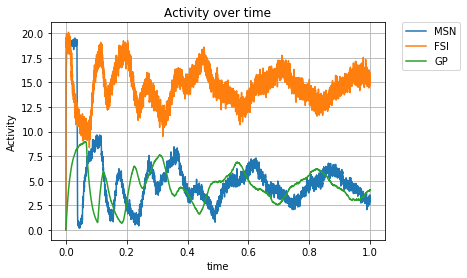

In [11]:
plt.plot(time_value,GpMsn_value,label='MSN')
plt.plot(time_value,MsnFsi_value,label='FSI')
plt.plot(time_value,FsiGp_value,label='GP')

plt.title('Activity over time')
plt.ylabel('Activity')
plt.xlabel('time')
plt.grid()

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()